<a href="https://colab.research.google.com/github/syasyamani/SECB4313/blob/main/%5B1_April_2024%5D_Heart_Disease_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [78]:
from google.colab import drive
import os
import pandas as pd
drive.mount('/content/gdrive')

dataset_dir = "/content/gdrive/My Drive/Colab Notebooks/"
model_loc = "/content/gdrive/My Drive/Colab Notebooks/"

print(os.listdir('/content/gdrive/My Drive/Colab Notebooks/'))
data = pd.read_csv(dataset_dir + 'heart.csv')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['A2_Syasya_Syamimi_Shafoora.ipynb', 'breastcancer.csv', 'BIoinformatics Database ', 'BioDB_Project.ipynb', 'heart.csv', '[1_April_2024]_Heart_Disease_NN.ipynb']


Summary Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std    

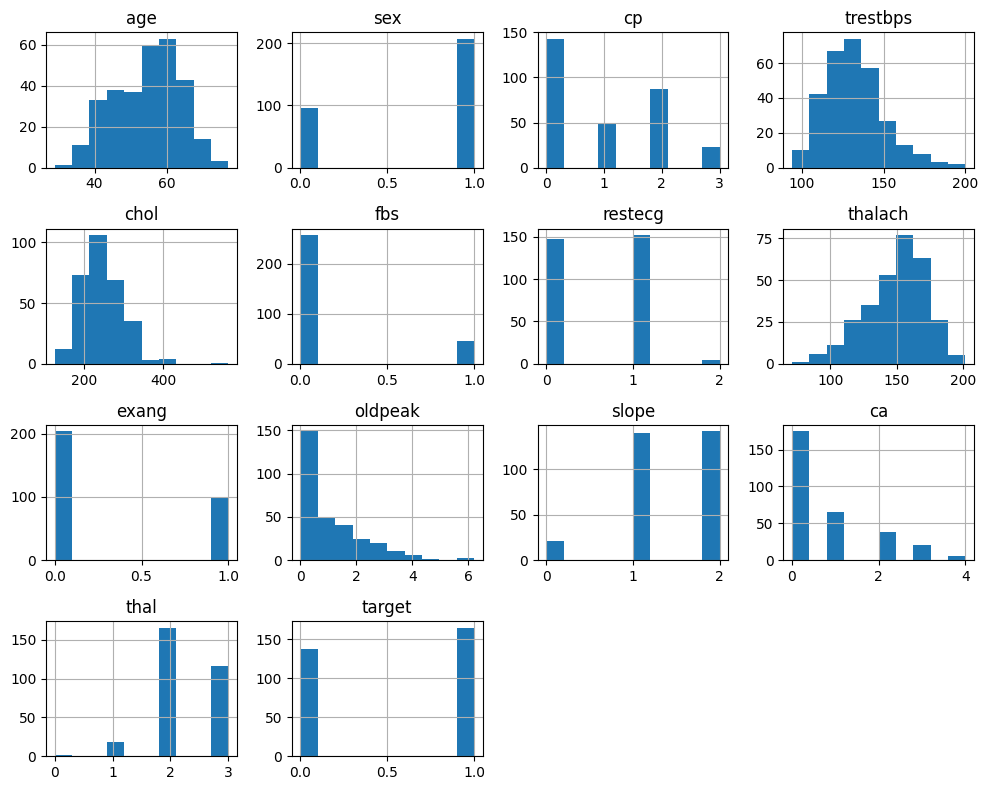

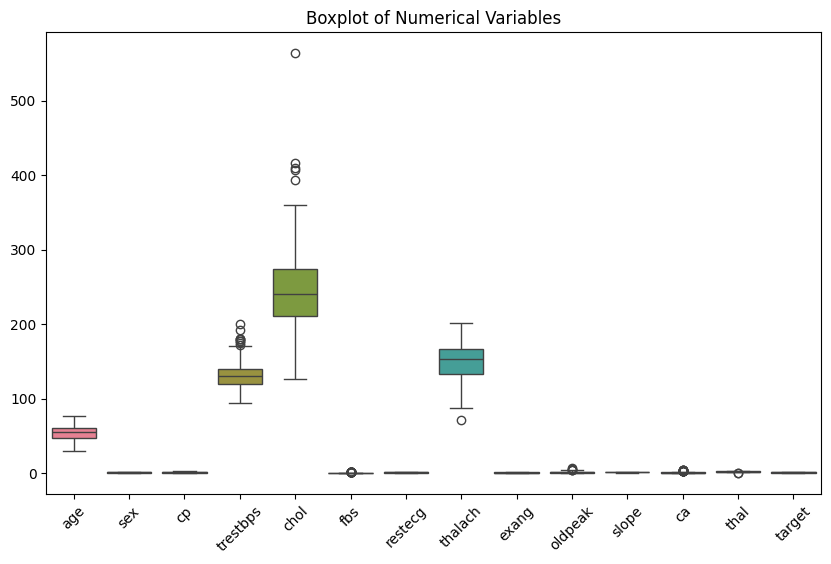

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64



In [79]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.

print("Summary Statistics:")
print(data.describe())
print()

# Histograms for numerical variables
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Boxplot of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

# 3. Handling Missing Values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)
print()

In [80]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object


The purpose of the code snippet provided is to treat certain columns in the dataset (data) as categorical variables and cast their data type to object.

In [81]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.get_dummies(data, columns=catagorialList, drop_first=True)

<ipython-input-81-b7ad0cf4ddad>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=catagorialList, drop_first=True)
<ipython-input-81-b7ad0cf4ddad>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=catagorialList, drop_first=True)
<ipython-input-81-b7ad0cf4ddad>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=catagorialList, drop_first=True)
<ipython-input-81-b7ad0cf4ddad>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=catagoria

In [82]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values
y = y.reshape(y.shape[0],1)
x = data.drop(['target'],axis=1)
##

Lines 3, 4, and 5 of the code prepare the data for modeling:

- y = data['target'].values: Extracts the target column from the DataFrame data and converts it to a NumPy array.
- y = y.reshape(y.shape[0], 1): Reshapes y to ensure it has a single column, which is often necessary for compatibility with certain machine learning models.
- x = data.drop(['target'], axis=1): Creates a new DataFrame x by removing the 'target' column from data, assuming it contains the input features.

In [83]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset

# Create a simple dataset
simple_data = np.array([[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]])

# Print the original dataset
print("Original dataset:")
print(simple_data)

# Normalization
normalized_data = (simple_data - np.min(simple_data)) / (np.max(simple_data) - np.min(simple_data))

# Print the normalized dataset
print("\nNormalized dataset:")
print(normalized_data)

Original dataset:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Normalized dataset:
[[0.    0.125 0.25 ]
 [0.375 0.5   0.625]
 [0.75  0.875 1.   ]]


In [84]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


After applying min-max normalization to the heart dataset:

- Numeric features like age, resting blood pressure, cholesterol, etc., are scaled to range between 0 and 1.
- Categorical variables are one-hot encoded, preserving their binary or multi-level nature.
- The dataset is now ready for machine learning algorithms that require features to be on a similar scale for optimal performance.

In [85]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(181, 21)
(61, 21)
(61, 21)


In [86]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test (70% train, 20% val, and 10% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2222, random_state=42) # 0.2222 is approximately 20% of the original dataset

# Print the shapes of train, validation, and test sets
print("Train set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Test set shape:", x_test.shape)


Train set shape: (211, 21)
Validation set shape: (61, 21)
Test set shape: (31, 21)


In [87]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1408      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



The neural network created using the Sequential() function with layers of 64, 32, and 1 neurons, respectively, along with softmax and sigmoid activation functions serves different purposes at each layer.

In [88]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

The choice of loss function, optimizer, and metrics has a significant impact on the model's training process and performance.
These components influence how the model learns from the data, updates its parameters, and evaluates its performance during training and testing phases.
The selection of these components should be based on the specific characteristics of the problem at hand and the desired behavior of the model.

In [89]:
# start the model training

output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
14/14 [==============================] - 33s 18ms/step - loss: 0.2498 - acc: 0.5024 - val_loss: 0.2464 - val_acc: 0.5902
Epoch 2/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2487 - acc: 0.5308 - val_loss: 0.2423 - val_acc: 0.5902
Epoch 3/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2467 - acc: 0.5308 - val_loss: 0.2392 - val_acc: 0.5902
Epoch 4/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2396 - acc: 0.5924 - val_loss: 0.2286 - val_acc: 0.7213
Epoch 5/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2270 - acc: 0.8199 - val_loss: 0.2091 - val_acc: 0.8525
Epoch 6/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2071 - acc: 0.8389 - val_loss: 0.1853 - val_acc: 0.8689
Epoch 7/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.1857 - acc: 0.8436 - val_loss: 0.1616 - val_acc: 0.8689
Epoch 8/1000
14/14 [==============================] - 0s 6ms/step - loss: 

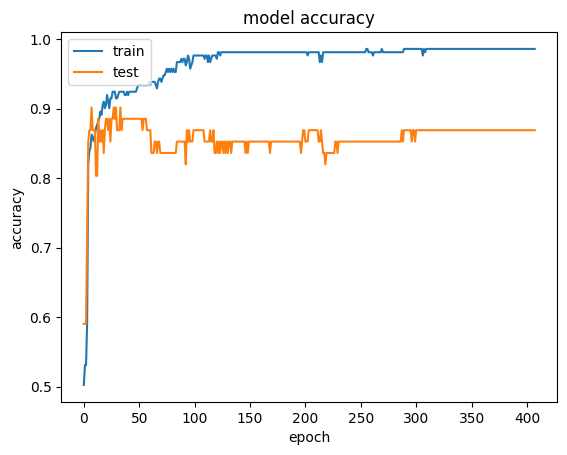

In [90]:
### 12. What does the plot generated by this code represent?

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

The plot generated by the provided code represents the model's accuracy over epochs during training and validation.

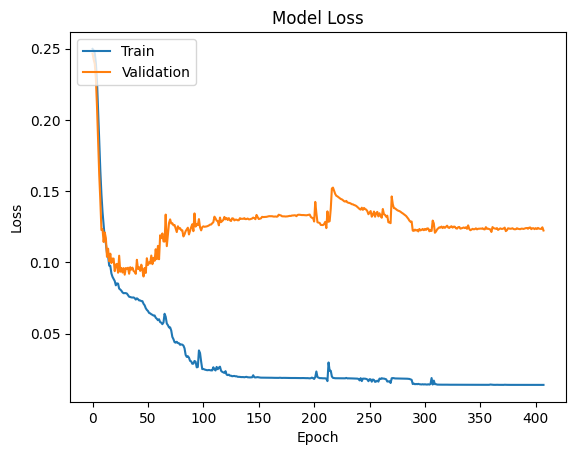

In [91]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [92]:
### 14. What is the purpose of evaluating the model on the test dataset?


#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

1/1 [==============================] - 0s 454ms/step - loss: 1.0827 - accuracy: 0.8065

accuracy: 80.65%
loss: 1.08


Evaluating the model on the test dataset helps to assess the model's performance on unseen data, providing an estimate of how well the model generalizes to new samples. This step is crucial for understanding the model's real-world performance and detecting overfitting.

In [93]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

1/1 [==============================] - 0s 127ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [1]  Predicted: [1] Result: Pass
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [1] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [0]  Result: Fail
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [0]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result

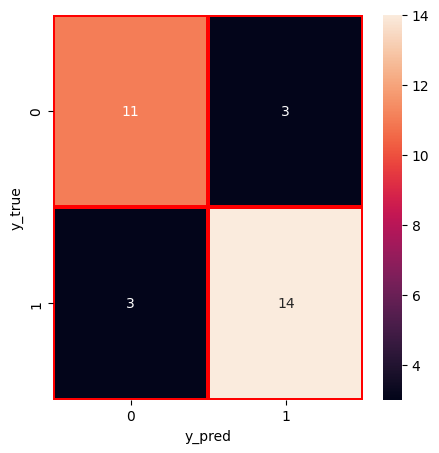


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.82      0.82      0.82        17

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



In [94]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

15. A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

It helps in understanding the performance of the classification model by summarizing the counts of true positive (TP), false positive (FP), false negative (FN), and true negative (TN) predictions.

- TP (True Positive): The number of correctly predicted positive instances.
- FP (False Positive): The number of incorrectly predicted positive instances.
- FN (False Negative): The number of incorrectly predicted negative instances.
- TN (True Negative): The number of correctly predicted negative instances.

16. The classification report provides a summary of various evaluation metrics for each class in a classification problem. It includes metrics such as precision, recall, F1-score, and support.

- Precision: The ratio of correctly predicted positive observations to the total predicted positives.
- Recall: The ratio of correctly predicted positive observations to the all observations in actual class.
- F1-score: The harmonic mean of precision and recall, providing a balance between the two metrics.
- Support: The number of actual occurrences of the class in the specified dataset